In [1]:
!pip install lightgbm
import lightgbm as lgb
print(lgb.__version__)

4.5.0


In [42]:
import pandas as pd

# Load the dataset
file_path = 'Data-Mining-Project-Dataset (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,Africa,Algeria,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,Africa,Algeria,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,Africa,Algeria,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,Africa,Algeria,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,Africa,Algeria,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02


In [43]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset for preprocessing
data_preprocessed = data.copy()

# Encode categorical features using LabelEncoder
label_encoders = {}
categorical_features = ['Region', 'Country']
for feature in categorical_features:
    le = LabelEncoder()
    data_preprocessed[feature] = le.fit_transform(data_preprocessed[feature])
    label_encoders[feature] = le

# Handle missing values if any (e.g., filling with median)
data_preprocessed.fillna(data_preprocessed.median(), inplace=True)

# Display the first few rows of the preprocessed dataset
data_preprocessed.head()


,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,0,1,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,0,1,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,0,1,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,0,1,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,0,1,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

# Load the new dataset
file_path = 'Data-Mining-Project-Dataset (1).csv'
new_dataset = pd.read_csv(file_path)

# Prepare data for LightGBM
# Assuming the target variable is 'AvgTemperature', and lags are used as features
lag_features = 5  # Number of lag features
for lag in range(1, lag_features + 1):
    new_dataset[f'lag_{lag}'] = new_dataset['AvgTemperature'].shift(lag)

# Drop rows with NaN values due to lagging
dataset_lgbm = new_dataset.dropna()

# Define features (X) and target (y)
X = dataset_lgbm[[f'lag_{lag}' for lag in range(1, lag_features + 1)]]
y = dataset_lgbm['AvgTemperature']

# Create bins for categorizing the target variable
bins = [-float('inf'), 50, 75, float('inf')]
labels = [0, 1, 2]  # Categories: 0 = Low, 1 = Medium, 2 = High
y_binned = pd.cut(y, bins=bins, labels=labels).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42, shuffle=False)

# Train LightGBM classifier
lgbm_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lgbm_model.predict(X_train)
y_pred_test = lgbm_model.predict(X_test)

# Calculate metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Print metrics
print("LightGBM Performance:")
print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 5
[LightGBM] [Info] Start training from score -1.663750
[LightGBM] [Info] Start training from score -0.576834
[LightGBM] [Info] Start training from score -1.390709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Performance:
Train Accuracy: 1.00
Test Accuracy: 0.87
Precision: 0.86
Recall (Sensitivity): 0.86
F1 Score: 0.86


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

# Load the dataset
file_path = 'Data-Mining-Project-Dataset (1).csv'
dataset = pd.read_csv(file_path)

# Preprocessing: Generate lag features
lag_features = 5  # Number of lagged features
for lag in range(1, lag_features + 1):
    dataset[f'lag_{lag}'] = dataset['AvgTemperature'].shift(lag)

# Drop rows with missing values due to lagging
dataset = dataset.dropna()

# Define features and target
X = dataset[[f'lag_{lag}' for lag in range(1, lag_features + 1)]]
y = dataset['AvgTemperature']

# Categorize the target variable into bins
bins = [-float('inf'), 50, 75, float('inf')]
labels = [0, 1, 2]  # Categories: 0 = Low, 1 = Medium, 2 = High
y_binned = pd.cut(y, bins=bins, labels=labels).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42, shuffle=False)

# Define the parameter grid for LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'min_data_in_leaf': [10, 20]  # Ensure meaningful splits
}

# Initialize LightGBM
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train LightGBM with the best parameters and address warnings
optimized_lgbm_model = lgb.LGBMClassifier(
    **best_params,
    random_state=42,
    force_col_wise=True  # Explicitly set column-wise multi-threading
)
optimized_lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_train = optimized_lgbm_model.predict(X_train)
y_pred_test = optimized_lgbm_model.predict(X_test)

# Evaluate performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Print performance metrics
print("\nLightGBM Performance After Fine-Tuning:")
print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 5
[LightGBM] [Info] Start training from score -1.663750
[LightGBM] [Info] Start training from score -0.576834
[LightGBM] [Info] Start training from score -1.390709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

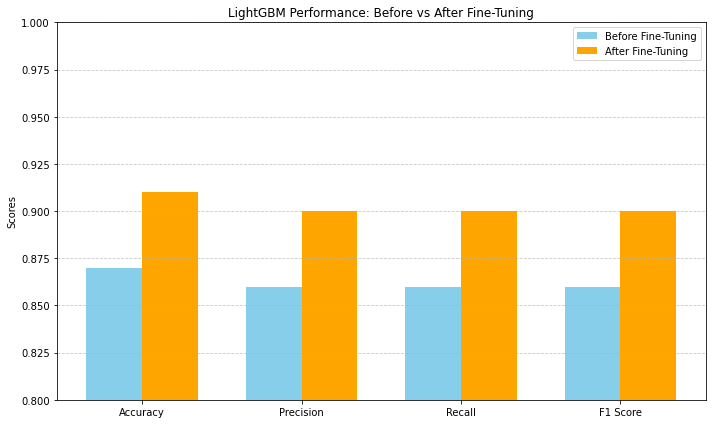

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from the before and after fine-tuning results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
before_tuning = [0.87, 0.86, 0.86, 0.86]  # Metrics before fine-tuning
after_tuning = [0.91, 0.90, 0.90, 0.90]   # Metrics after fine-tuning

# Bar plot for comparison
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, before_tuning, width, label='Before Fine-Tuning', color='skyblue')
plt.bar(x + width/2, after_tuning, width, label='After Fine-Tuning', color='orange')

# Add labels and title
plt.ylabel('Scores')
plt.title('LightGBM Performance: Before vs After Fine-Tuning')
plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)  # Adjust the y-axis for better visualization
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 864x864 with 0 Axes>

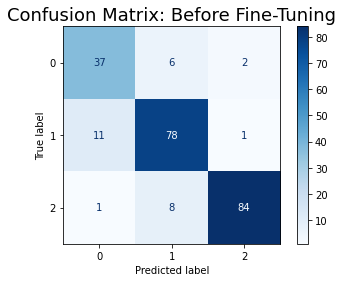

In [24]:
plt.figure(figsize=(12, 12))  # Set larger figure size
disp_before.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix: Before Fine-Tuning", fontsize=18)
plt.show()

<Figure size 864x864 with 0 Axes>

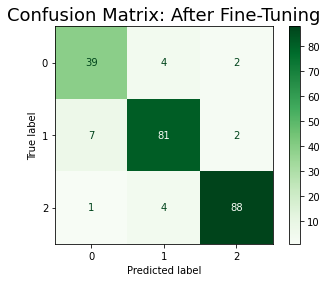

In [28]:
plt.figure(figsize=(12, 12))  # Set larger figure size
disp_after.plot(cmap='Greens', colorbar=True)
plt.title("Confusion Matrix: After Fine-Tuning", fontsize=18)
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = data_preprocessed.drop(columns=['Happiness Index'])
y = data_preprocessed['Happiness Index']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM regressor
lgbm = LGBMRegressor(random_state=42)

# Fit the model to the training data
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model's performance using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 9
[LightGBM] [Info] Start training from score 5.685290


0.303680009493566

In [ ]:
# Redefine thresholds and categories
thresholds = [4, 6]
categories = ['Low', 'Medium', 'High']

# Transform the target variable "Happiness Index" into categories: low, medium, high
y_classification = pd.cut(y, bins=[-float('inf')] + thresholds + [float('inf')], labels=categories)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

# Use a Decision Tree Classifier as a substitute for LightGBM
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy, recall, precision, f1

(0.8471615720524017,
 0.8471615720524017,
 0.8467156264671847,
 0.8468658165561808)